In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..', '..')))

In [2]:
%ls

 Volume in drive C is Acer
 Volume Serial Number is 70D2-9BA1

 Directory of c:\Users\melan\shared-folder\Thesis\SSL-for-Quantum-Cirucits-Generation\QCCL\notebooks

20/10/2024  13:17    <DIR>          .
28/09/2024  21:20    <DIR>          ..
24/09/2024  19:19         5,736,098 best_model.pth
24/09/2024  19:18               787 hyperparam_tuning_results_with_configs.yaml
11/10/2024  10:46           132,935 training.ipynb
24/09/2024  19:19            24,818 training_best_history.png
24/09/2024  18:59           204,856 training_byol big embedding.ipynb
14/10/2024  12:11           247,018 training_byol.ipynb
19/09/2024  16:50           248,587 training_norms_visual.ipynb
01/10/2024  07:38           441,652 training-visual.ipynb
28/10/2024  11:07           374,033 transforms_debugging.ipynb
               9 File(s)      7,410,784 bytes
               2 Dir(s)  83,296,325,632 bytes free


In [3]:
from qiskit import QuantumCircuit
from Data.QuantumCircuitGraph import QuantumCircuitGraph


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelapp.py", 

In [4]:
# Settings

GATE_TYPE_MAP = {
    'cx': 0, 
    'h': 1, 
    'x': 2,
    'z': 3,
    't': 4
    # Add here all possible gate types
} # map gate type to index in one-hot encoding
# add id always in last position
GATE_TYPE_MAP['id'] = len(GATE_TYPE_MAP)


QuantumCircuitGraph.set_gate_type_map(GATE_TYPE_MAP)
QuantumCircuitGraph.set_include_params(False)
QuantumCircuitGraph.set_include_identity_gates(False)
QuantumCircuitGraph.set_differentiate_cx(True)


print("Modified GATE_TYPE_MAP:", QuantumCircuitGraph.GATE_TYPE_MAP)
print("Modified include_params:", QuantumCircuitGraph.include_params)
print("Modified include_identity_gates:", QuantumCircuitGraph.include_identity_gates)
print("Modified differentiate_cx:", QuantumCircuitGraph.differentiate_cx)

Modified GATE_TYPE_MAP: {'cx': 0, 'h': 1, 'x': 2, 'z': 3, 't': 4, 'id': 5}
Modified include_params: False
Modified include_identity_gates: False
Modified differentiate_cx: True


### Test AddIdentityGatesTransformation

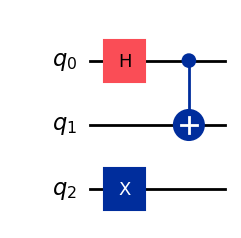

In [5]:
# Create a simple quantum circuit
num_qubits = 3
qc = QuantumCircuit(num_qubits)
qc.h(0)
qc.cx(0, 1)
qc.x(2)

# Visualize the initial quantum circuit
qc.draw('mpl')

In [6]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

In [7]:
from QCCL.transformations import AddIdentityGatesTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = AddIdentityGatesTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit


Transformed Circuit:


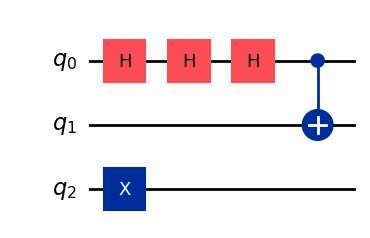

In [8]:
# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test RemoveIdentityGatesTransformation

In [9]:
from QCCL.transformations import RemoveIdentityGatesTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
reverse_transformation = RemoveIdentityGatesTransformation(transformed_qcg)

# Apply the transformation
transformed_qcg = reverse_transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

Pattern subgraphs: [(None, <networkx.classes.digraph.DiGraph object at 0x000001A27F2B6FC0>), (None, <networkx.classes.digraph.DiGraph object at 0x000001A266E51CA0>), (None, <networkx.classes.digraph.DiGraph object at 0x000001A25ACF2540>), (None, <networkx.classes.digraph.DiGraph object at 0x000001A27F25FC80>), (None, <networkx.classes.digraph.DiGraph object at 0x000001A266F20A40>)]
Matching subgraphs: [{'h_0_1': 'h_0_0', 'h_0_2': 'h_0_1'}, {'h_0_0': 'h_0_0', 'h_0_1': 'h_0_1'}]
Matching key: None
Matching subgraph selected: {'h_0_1': 'h_0_0', 'h_0_2': 'h_0_1'}
Current operations: [(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 0),), ()), (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 0),), ()), (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 0),), ()), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'),


Transformed Circuit:


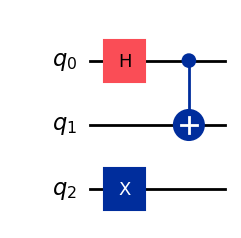

In [10]:
# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test SwapControlTargetTransformation


1st PATTERN: CNOT -> CNOT -> H, H, CNOT, H, H

Original Circuit:


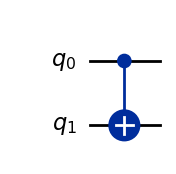

In [11]:
qc = QuantumCircuit(2)
qc.cx(0, 1)  # Add CNOT gate

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

In [12]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

In [13]:
from QCCL.transformations import SwapControlTargetTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = SwapControlTargetTransformation(qcg)

# Apply the transformation

transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit


Pattern subgraph: [('cx', <networkx.classes.digraph.DiGraph object at 0x000001A25ACF0B00>), ('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x000001A266EE11F0>), ('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x000001A264FFBF20>), ('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x000001A27F3DF740>), ('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x000001A27F15D460>)]
Pattern subgraphs: [('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x000001A266EE11F0>), ('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x000001A27F15D460>), ('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x000001A264FFBF20>), ('cx', <networkx.classes.digraph.DiGraph object at 0x000001A25ACF0B00>), ('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x000001A27F3DF740>)]
Matching subgraphs: [{'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0': 'cx_1_target_0'}]
Matching key: cx
Matching subgraph selected: {'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0':


Transformed Circuit:


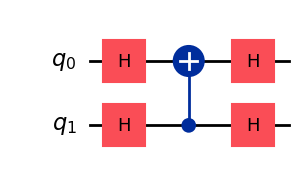

In [14]:

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2nd PATTERN: CNOT, H, H -> H, H, CNOT

Original Circuit:


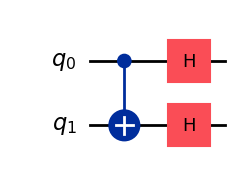

In [15]:
qc = QuantumCircuit(2)
qc.cx(0, 1)  # Add CNOT gate
qc.h(0)
qc.h(1)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

In [16]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

In [17]:
from QCCL.transformations import SwapControlTargetTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = SwapControlTargetTransformation(qcg)

# Apply the transformation

transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

Pattern subgraph: [('cx', <networkx.classes.digraph.DiGraph object at 0x000001A27F47D6A0>), ('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x000001A27F47EBA0>), ('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x000001A27F1C7380>), ('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x000001A27F44BAA0>), ('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x000001A266E53080>)]
Pattern subgraphs: [('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x000001A27F1C7380>), ('cx', <networkx.classes.digraph.DiGraph object at 0x000001A27F47D6A0>), ('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x000001A27F47EBA0>), ('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x000001A266E53080>), ('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x000001A27F44BAA0>)]
Matching subgraphs: [{'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0': 'cx_1_target_0'}]
Matching key: cx
Matching subgraph selected: {'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0':


Transformed Circuit:


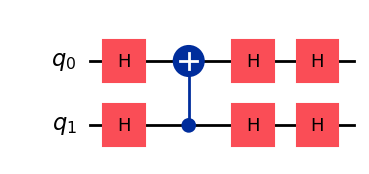

In [18]:
# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2nd PATTERN: H, CNOT, H -> H, CNOT, H

Original Circuit:


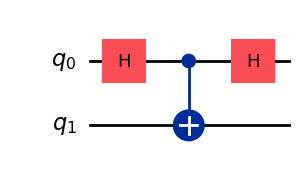

In [19]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)  # Add CNOT gate
qc.h(0)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraph: [('cx', <networkx.classes.digraph.DiGraph object at 0x000001A27F5339B0>), ('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x000001A27F4BB3B0>), ('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x000001A2670F78F0>), ('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x000001A266DA6630>), ('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x000001A27F29E6C0>)]
Pattern subgraphs: [('cx', <networkx.classes.digraph.DiGraph object at 0x000001A27F5339B0>), ('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x000001A266DA6630>), ('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x000001A27F4BB3B0>), ('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x000001A27F29E6C0>), ('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x000001A2670F78F0>)]
Matching subgraphs: [{'cx_0_control_1': 'cx_0_control_0', 'cx_1_target_1': 'cx_1_target_0'}]
Matching key: cx
Matching subgraph selected: {'cx_0_control_1': 'cx_0_control_0', 'cx_1_target_1':

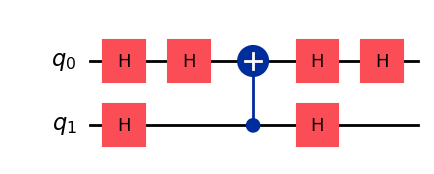

In [20]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = SwapControlTargetTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test CNOTDecompositionTransformation

1st PATTERN: CNOT -> CNOT, CNOT, CNOT, CNOT

Original Circuit:


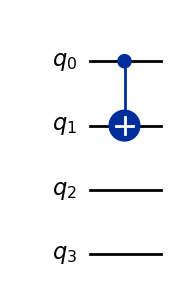

In [21]:
qc = QuantumCircuit(4)
qc.cx(0, 1)  # Add CNOT gate

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('t-c-t-c', <networkx.classes.digraph.DiGraph object at 0x000001A2657DFFE0>), ('cx', <networkx.classes.digraph.DiGraph object at 0x000001A27F5A07D0>), ('c-t-c-t', <networkx.classes.digraph.DiGraph object at 0x000001A27F533BF0>)]
Matching subgraphs: [{'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0': 'cx_1_target_0'}]
Matching key: cx
Matching subgraph selected: {'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0': 'cx_1_target_0'}
Graph nodes: ['cx_0_control_0', 'cx_1_target_0']
Transformed operations: [(Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 3), Qubit(QuantumRegister(4, 'q'), 1)], []), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 3)], []), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 3), Qubit(QuantumRegister(4, 'q'), 1)], []), (Instruction(name='cx', num_qubits=2, num_clb

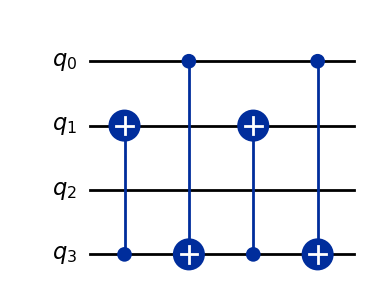

In [22]:
from QCCL.transformations import CNOTDecompositionTransformation

# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = CNOTDecompositionTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2st PATTERN: CNOT, CNOT, CNOT, CNOT -> CNOT or 4 CNOTs

Original Circuit:


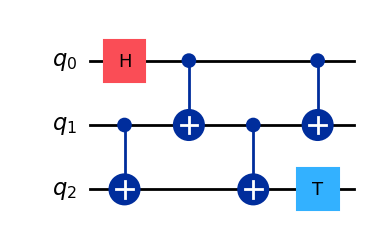

In [23]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.cx(1, 2)  
qc.cx(0, 1)  
qc.cx(1, 2)
qc.cx(0, 1) 
qc.t(2)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('c-t-c-t', <networkx.classes.digraph.DiGraph object at 0x000001A27F5C5820>), ('t-c-t-c', <networkx.classes.digraph.DiGraph object at 0x000001A264FFBBC0>), ('cx', <networkx.classes.digraph.DiGraph object at 0x000001A27F68FF50>)]
Matching subgraphs: [{'cx_1_control_1': 'cx_1_control_0', 'cx_2_target_1': 'cx_2_target_0', 'cx_1_target_2': 'cx_1_target_1', 'cx_0_control_2': 'cx_0_control_1', 'cx_1_control_3': 'cx_1_control_2', 'cx_2_target_3': 'cx_2_target_2', 'cx_0_control_4': 'cx_0_control_3', 'cx_1_target_4': 'cx_1_target_3'}]
Matching key: c-t-c-t
Matching subgraph selected: {'cx_1_control_1': 'cx_1_control_0', 'cx_2_target_1': 'cx_2_target_0', 'cx_1_target_2': 'cx_1_target_1', 'cx_0_control_2': 'cx_0_control_1', 'cx_1_control_3': 'cx_1_control_2', 'cx_2_target_3': 'cx_2_target_2', 'cx_0_control_4': 'cx_0_control_3', 'cx_1_target_4': 'cx_1_target_3'}
Graph nodes: ['h_0_0', 'cx_1_control_1', 'cx_2_target_1', 'cx_0_control_2', 'cx_1_target_2', 'cx_1_control_3', 'cx_2_

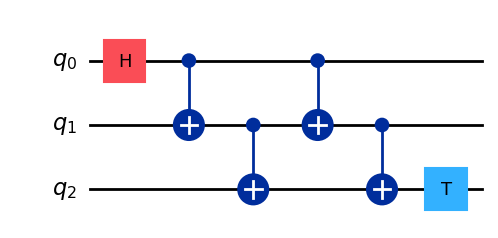

In [24]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = CNOTDecompositionTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test ChangeOfBasisTransformation

In [25]:
from qiskit.circuit.library import HGate, ZGate, XGate, TGate
import random
from QCCL.transformations import ChangeOfBasisTransformation

1st PATTERN: single H, Z, or X

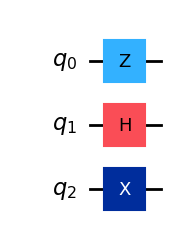

In [26]:
# Circuit with HZH pattern
qc = QuantumCircuit(3)
qc.z(0)
qc.h(1)
qc.x(2)

qc.draw('mpl')

Pattern subgraphs: [('h-z-h', <networkx.classes.digraph.DiGraph object at 0x000001A27F78E0F0>), ('z-h', <networkx.classes.digraph.DiGraph object at 0x000001A27F195970>), ('x-h-z', <networkx.classes.digraph.DiGraph object at 0x000001A27F6BCEF0>), ('h-z', <networkx.classes.digraph.DiGraph object at 0x000001A27F5F54C0>), ('h', <networkx.classes.digraph.DiGraph object at 0x000001A27F7DB290>), ('x-h', <networkx.classes.digraph.DiGraph object at 0x000001A27F6334A0>), ('h-x', <networkx.classes.digraph.DiGraph object at 0x000001A27F8BB020>), ('h-x-h', <networkx.classes.digraph.DiGraph object at 0x000001A27F632DB0>), ('z-h-x', <networkx.classes.digraph.DiGraph object at 0x000001A27F8960C0>), ('x', <networkx.classes.digraph.DiGraph object at 0x000001A27F532E40>), ('z', <networkx.classes.digraph.DiGraph object at 0x000001A27F9205F0>)]
Matching subgraphs: [{'h_1_1': 'h_0_0'}]
Matching key: h
Matching subgraph selected: {'h_1_1': 'h_0_0'}
Replacement: [(Instruction(name='z', num_qubits=1, num_clbit

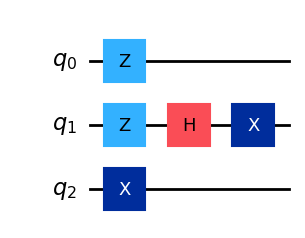

In [27]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ChangeOfBasisTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2nd PATTERN: HZ, ZH, HX, XH

Original Circuit:


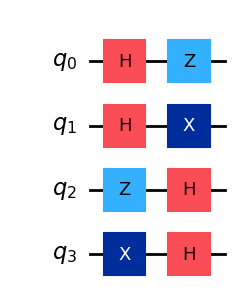

In [28]:
qc = QuantumCircuit(4)
qc.h(0)
qc.z(0)
qc.h(1)
qc.x(1)
qc.z(2)
qc.h(2)
qc.x(3)
qc.h(3)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('z', <networkx.classes.digraph.DiGraph object at 0x000001A27F513E30>), ('x-h', <networkx.classes.digraph.DiGraph object at 0x000001A27FA2D7C0>), ('x-h-z', <networkx.classes.digraph.DiGraph object at 0x000001A27F24BA70>), ('h-x-h', <networkx.classes.digraph.DiGraph object at 0x000001A27F5F4C50>), ('z-h', <networkx.classes.digraph.DiGraph object at 0x000001A27FA2D910>), ('x', <networkx.classes.digraph.DiGraph object at 0x000001A27FA2F410>), ('h-z-h', <networkx.classes.digraph.DiGraph object at 0x000001A27F7331A0>), ('h', <networkx.classes.digraph.DiGraph object at 0x000001A27F78E0F0>), ('z-h-x', <networkx.classes.digraph.DiGraph object at 0x000001A27F4CBC50>), ('h-z', <networkx.classes.digraph.DiGraph object at 0x000001A27FA2F590>), ('h-x', <networkx.classes.digraph.DiGraph object at 0x000001A27FA2CE30>)]
Matching subgraphs: [{'z_0_1': 'z_0_0'}, {'z_2_4': 'z_0_0'}]
Matching key: z
Matching subgraph selected: {'z_2_4': 'z_0_0'}
Replacement: [(Instruction(name='h', num

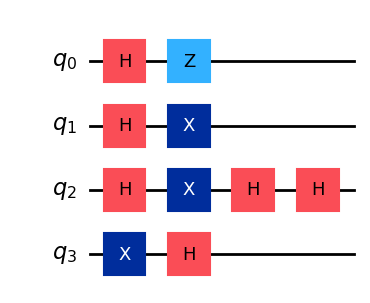

In [29]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ChangeOfBasisTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

3rd PATTERN: HXH, HZH, ...

Original Circuit:


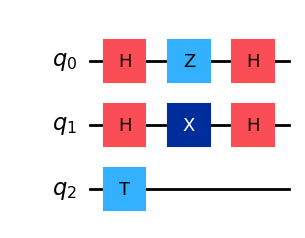

In [30]:
qc = QuantumCircuit(3)
qc.h(0)
qc.z(0)
qc.h(0)
qc.h(1)
qc.t(2)
qc.x(1)
qc.h(1)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('z-h', <networkx.classes.digraph.DiGraph object at 0x000001A27FB11640>), ('h-x', <networkx.classes.digraph.DiGraph object at 0x000001A27F863020>), ('x', <networkx.classes.digraph.DiGraph object at 0x000001A27F68C980>), ('x-h', <networkx.classes.digraph.DiGraph object at 0x000001A27FA73800>), ('h-z', <networkx.classes.digraph.DiGraph object at 0x000001A27FACF4A0>), ('z', <networkx.classes.digraph.DiGraph object at 0x000001A27FA2C8F0>), ('x-h-z', <networkx.classes.digraph.DiGraph object at 0x000001A27FACE3C0>), ('z-h-x', <networkx.classes.digraph.DiGraph object at 0x000001A27F8BBF80>), ('h', <networkx.classes.digraph.DiGraph object at 0x000001A264FFA390>), ('h-x-h', <networkx.classes.digraph.DiGraph object at 0x000001A27F4218B0>), ('h-z-h', <networkx.classes.digraph.DiGraph object at 0x000001A27F37F4A0>)]
Matching subgraphs: [{'z_0_1': 'z_0_0', 'h_0_2': 'h_0_1'}]
Matching key: z-h
Matching subgraph selected: {'z_0_1': 'z_0_0', 'h_0_2': 'h_0_1'}
Replacement: [(Instruc

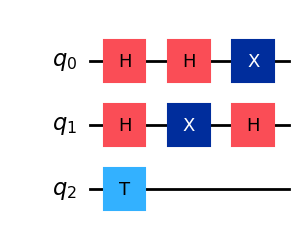

In [31]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ChangeOfBasisTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test ParallelXTransformation

1st PATTERN: parallel X

Original Circuit:


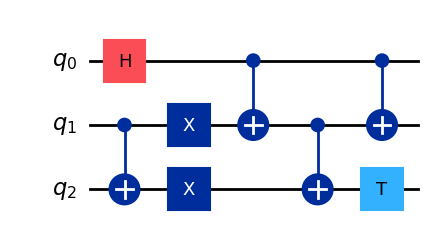

In [32]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.cx(1, 2)  
qc.x(1)
qc.x(2)
qc.cx(0, 1)  
qc.cx(1, 2)
qc.cx(0, 1) 
qc.t(2)

qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('cx-x-cx', <networkx.classes.digraph.DiGraph object at 0x000001A27F5A1E80>)]
Matching subgraphs: []
Matching key: cx-x-cx
Pred_ctrl: cx_1_control_1, Succ_ctrl: cx_1_target_4, Pred_trgt: cx_2_target_1, Succ_trgt: cx_2_target_5
Pred_ctrl: x_1_add1, Succ_ctrl: cx_1_target_4, Pred_trgt: cx_2_target_add0, Succ_trgt: cx_2_target_5
Added h gate to qubit 0
Frontier: {0: 'cx_0_control_4', 1: 'cx_1_control_1', 2: 'cx_2_target_1'}
Frontier: {0: 'cx_0_control_4'}
Frontier: {0: 'cx_0_control_4', 1: 'cx_1_control_add0', 2: 'cx_2_target_add0'}
Frontier: {0: 'cx_0_control_4'}
Added x gate to qubit 1
Frontier: {0: 'cx_0_control_4', 1: 'cx_1_control_add2', 2: 'cx_2_target_add2'}
Frontier: {0: 'cx_0_control_4'}
Frontier: {0: 'cx_0_control_4', 1: 'cx_1_target_4', 2: 'cx_2_target_5'}
Frontier: {0: 'cx_0_control_4', 1: 'cx_1_target_4'}
Frontier: {0: 'cx_0_control_6', 1: 'cx_1_control_5', 2: 'cx_2_target_5'}
Frontier: {0: 'cx_0_control_6'}
Added t gate to qubit 2
Frontier: {0: 'cx_0_cont

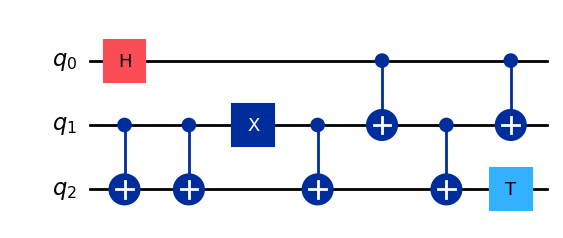

In [33]:
from QCCL.transformations import ParallelXTransformation

# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ParallelXTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2nd PATTERN: cx-x-cx

Original Circuit:


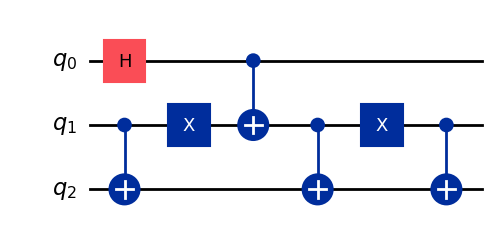

In [34]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.cx(1, 2)  
qc.x(1)
qc.cx(0, 1)  
qc.cx(1, 2)
qc.x(1)
qc.cx(1, 2)

qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('cx-x-cx', <networkx.classes.digraph.DiGraph object at 0x000001A27F632840>)]
Matching subgraphs: [{'cx_1_control_4': 'cx_0_control_0', 'cx_2_target_4': 'cx_1_target_0', 'x_1_5': 'x_0_1', 'cx_1_control_6': 'cx_0_control_2', 'cx_2_target_6': 'cx_1_target_2'}]
Matching key: cx-x-cx
Matching subgraph selected: {'cx_1_control_4': 'cx_0_control_0', 'cx_2_target_4': 'cx_1_target_0', 'x_1_5': 'x_0_1', 'cx_1_control_6': 'cx_0_control_2', 'cx_2_target_6': 'cx_1_target_2'}
Graph nodes: ['h_0_0', 'cx_1_control_1', 'cx_2_target_1', 'x_1_2', 'cx_0_control_3', 'cx_1_target_3', 'cx_1_control_4', 'cx_2_target_4', 'x_1_5', 'cx_1_control_6', 'cx_2_target_6']

Transformed Circuit:


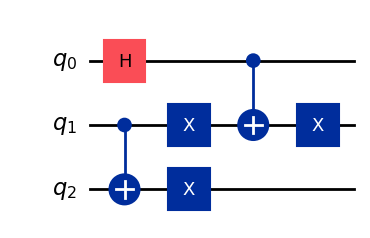

In [35]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ParallelXTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

TEST: no match

Original Circuit:


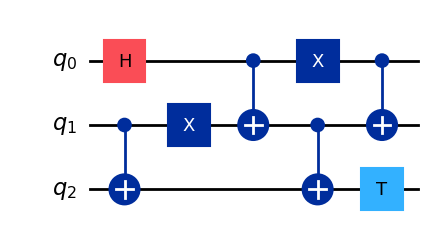

In [36]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.cx(1, 2)  
qc.x(1)
qc.cx(0, 1) 
qc.x(0) 
qc.cx(1, 2)
qc.cx(0, 1) 
qc.t(2)

qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

In [37]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ParallelXTransformation(qcg)

try:
    # Apply the transformation
    transformed_qcg = transformation.apply()  # Applying the transformation
    transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

    # Display the transformed circuit
    print("\nTransformed Circuit:")
    transformed_circuit.draw(output='mpl')

except Exception as e:
    print("Transformation failed with error:", e)

Pattern subgraphs: [('cx-x-cx', <networkx.classes.digraph.DiGraph object at 0x000001A27FEC6ED0>)]
Matching subgraphs: []
Matching key: cx-x-cx
Transformation failed with error: No matching subgraphs found for the given pattern.


### Test ParallelZTransformation

1st PATTERN: parallel Z

Original Circuit:


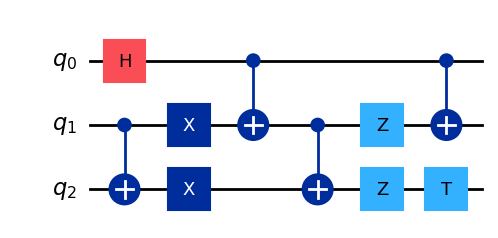

In [38]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.cx(1, 2)  
qc.x(1)
qc.x(2)
qc.cx(0, 1)  
qc.cx(1, 2)
qc.z(1)
qc.cx(0, 1) 
qc.z(2)
qc.t(2)

qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('cx-z-cx', <networkx.classes.digraph.DiGraph object at 0x000001A27FA5BAD0>)]
Matching subgraphs: []
Matching key: cx-z-cx
Matching subgraph: {'z_1_6': 'z_1_6', 'z_2_8': 'z_2_8'}
Matching key: parallel-z
Graph nodes: ['h_0_0', 'cx_1_control_1', 'cx_2_target_1', 'x_1_2', 'x_2_3', 'cx_0_control_4', 'cx_1_target_4', 'cx_1_control_5', 'cx_2_target_5', 'z_1_6', 'cx_0_control_7', 'cx_1_target_7', 'z_2_8', 't_2_9']
Pred_ctrl: cx_1_control_5, Succ_ctrl: cx_1_target_7, Pred_trgt: cx_2_target_5, Succ_trgt: t_2_9
Pred_ctrl: cx_1_control_add0, Succ_ctrl: cx_1_target_7, Pred_trgt: z_2_add1, Succ_trgt: t_2_9
Added h gate to qubit 0
Frontier: {0: 'cx_0_control_4', 1: 'cx_1_control_1', 2: 'cx_2_target_1'}
Frontier: {0: 'cx_0_control_4'}
Added x gate to qubit 1
Added x gate to qubit 2
Frontier: {0: 'cx_0_control_4', 1: 'cx_1_target_4', 2: 'cx_2_target_5'}
Frontier: {0: 'cx_0_control_4', 1: 'cx_1_target_4'}
Frontier: {0: 'cx_0_control_7', 1: 'cx_1_control_5', 2: 'cx_2_target_5'}
Fron

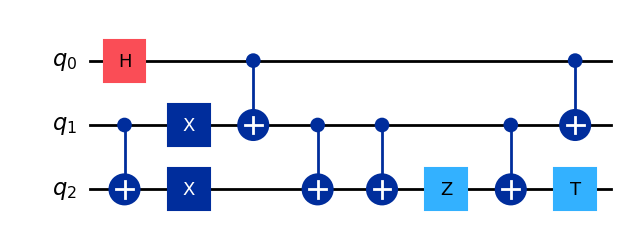

In [39]:
from QCCL.transformations import ParallelZTransformation

# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ParallelZTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2nd PATTERN: cx-z-cx

Original Circuit:


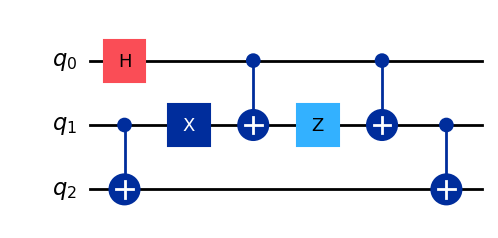

In [40]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.cx(1, 2)  
qc.x(1)
qc.cx(0, 1)  
qc.z(1)
qc.cx(0, 1)  
qc.cx(1, 2)


qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('cx-z-cx', <networkx.classes.digraph.DiGraph object at 0x000001A27FA704D0>)]
Matching subgraphs: [{'cx_0_control_3': 'cx_0_control_0', 'cx_1_target_3': 'cx_1_target_0', 'z_1_4': 'z_1_1', 'cx_0_control_5': 'cx_0_control_2', 'cx_1_target_5': 'cx_1_target_2'}]
Matching key: cx-z-cx
Matching subgraph selected: {'cx_0_control_3': 'cx_0_control_0', 'cx_1_target_3': 'cx_1_target_0', 'z_1_4': 'z_1_1', 'cx_0_control_5': 'cx_0_control_2', 'cx_1_target_5': 'cx_1_target_2'}
Matching subgraph: {'cx_0_control_3': 'cx_0_control_0', 'cx_1_target_3': 'cx_1_target_0', 'z_1_4': 'z_1_1', 'cx_0_control_5': 'cx_0_control_2', 'cx_1_target_5': 'cx_1_target_2'}
Matching key: cx-z-cx
Graph nodes: ['h_0_0', 'cx_1_control_1', 'cx_2_target_1', 'x_1_2', 'cx_0_control_3', 'cx_1_target_3', 'z_1_4', 'cx_0_control_5', 'cx_1_target_5', 'cx_1_control_6', 'cx_2_target_6']

Transformed Circuit:


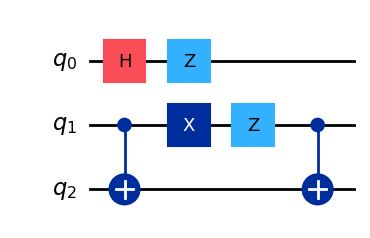

In [41]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ParallelZTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

Parallel Z at the start/end

Original Circuit:


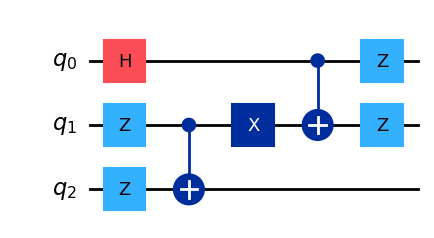

In [42]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.z(1)
qc.z(2)
qc.cx(1, 2)  
qc.x(1)
qc.cx(0, 1)  
qc.z(1)
qc.z(0)


qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('cx-z-cx', <networkx.classes.digraph.DiGraph object at 0x000001A20114EBD0>)]
Matching subgraphs: []
Matching key: cx-z-cx
Matching subgraph: {'z_1_6': 'z_1_6', 'z_0_7': 'z_0_7'}
Matching key: parallel-z
Graph nodes: ['h_0_0', 'z_1_1', 'z_2_2', 'cx_1_control_3', 'cx_2_target_3', 'x_1_4', 'cx_0_control_5', 'cx_1_target_5', 'z_1_6', 'z_0_7']
Pred_ctrl: cx_1_target_5, Succ_ctrl: None, Pred_trgt: cx_0_control_5, Succ_trgt: None
Pred_ctrl: cx_1_control_add0, Succ_ctrl: None, Pred_trgt: z_0_add1, Succ_trgt: None
Added h gate to qubit 0
Added z gate to qubit 1
Added z gate to qubit 2
Frontier: {0: 'cx_0_control_5', 1: 'cx_1_control_3', 2: 'cx_2_target_3'}
Frontier: {0: 'cx_0_control_5'}
Added x gate to qubit 1
Frontier: {0: 'cx_0_control_5', 1: 'cx_1_target_5', 2: None}
Frontier: {0: 'cx_0_control_5', 1: 'cx_1_target_5'}
Frontier: {0: 'cx_0_target_add0', 1: 'cx_1_control_add0', 2: None}
Frontier: {0: 'cx_0_target_add0', 1: 'cx_1_control_add0'}
Added z gate to qubit 0
Front

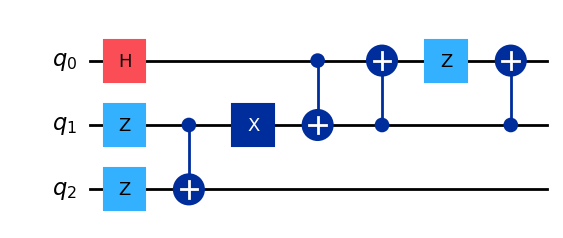

In [43]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ParallelZTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test CommuteCNOTRotationTransformation

Original Circuit:


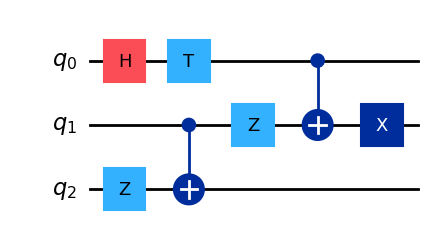

In [77]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.t(0)
qc.z(2)
qc.cx(1, 2)  
qc.z(1)
qc.cx(0, 1)  
qc.x(1)



qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

In [78]:
qcg.graph.nodes()

NodeView(('h_0_0', 't_0_1', 'z_2_2', 'cx_1_control_3', 'cx_2_target_3', 'z_1_4', 'cx_0_control_5', 'cx_1_target_5', 'x_1_6'))

Pattern subgraphs: [('x-cx-target', <networkx.classes.digraph.DiGraph object at 0x000001A2026E2C30>), ('cx-x-target', <networkx.classes.digraph.DiGraph object at 0x000001A2025B2300>), ('t-cx-control', <networkx.classes.digraph.DiGraph object at 0x000001A2027D1010>), ('cx-t-control', <networkx.classes.digraph.DiGraph object at 0x000001A202A99D60>), ('z-cx-control', <networkx.classes.digraph.DiGraph object at 0x000001A2025C9760>), ('cx-z-control', <networkx.classes.digraph.DiGraph object at 0x000001A2029BFC50>)]
Matching subgraphs: [{'cx_0_control_5': 'cx_0_control_0', 'cx_1_target_5': 'cx_1_target_0', 'x_1_6': 'x_1_1'}]
Matching key: cx-x-target
Matching subgraph selected: {'cx_0_control_5': 'cx_0_control_0', 'cx_1_target_5': 'cx_1_target_0', 'x_1_6': 'x_1_1'}
Predecessors and successors (before): {0: {'predecessors': ['t_0_1'], 'successors': [None]}, 1: {'predecessors': ['z_1_4', 'cx_1_target_5'], 'successors': ['x_1_6', None]}}
Predecessors: z_1_4
Successors: None
Common qubits: [1]
P

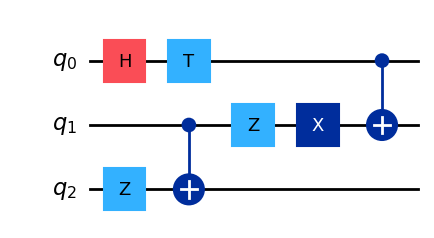

In [79]:
from QCCL.transformations import CommuteCNOTRotationTransformation

# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = CommuteCNOTRotationTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

In [80]:
#TODO: if a nonactive qubits, cannot build circuit from graph